# Logistic Map - Interactive Population Dynamics

## Как запустить виджеты в VSCode:

### Шаг 1: Установите необходимые пакеты
В терминале выполните:
```bash
pip install ipywidgets ipympl jupyter
```

### Шаг 2: Установите расширение VSCode
Убедитесь, что установлено расширение **Jupyter** в VSCode

### Шаг 3: Выполните ячейки по порядку
1. Выполните ячейку с импортами (numpy, matplotlib)
2. Выполните ячейку с определением `logistic_map`
3. Выполните ячейку с `time = np.arange(0, 30)`
4. Выполните ячейку с интерактивными виджетами

### Возможные проблемы:
- Если виджеты не отображаются, попробуйте **перезапустить kernel** (Ctrl+Shift+P → "Restart Kernel")
- Используйте альтернативную версию с `%matplotlib inline` (ниже в ноутбуке)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

0.6499336802367106


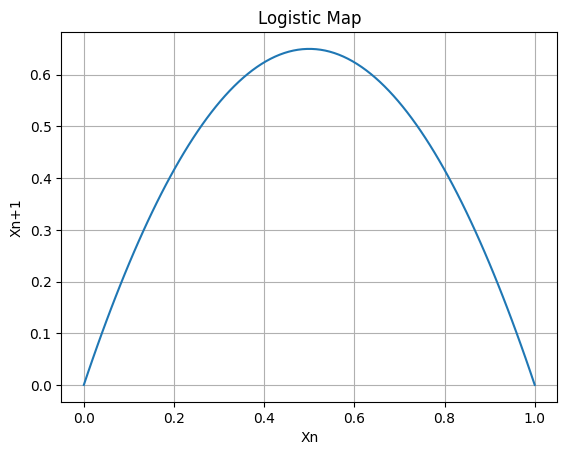

In [14]:
x_n = np.linspace(0, 1, 100)

def logistic_map(r, x):
    return r * x * (1 - x)

plt.grid()
plt.title("Logistic Map")
plt.xlabel("Xn")
plt.ylabel("Xn+1")
plt.plot(x_n, logistic_map(2.6, x_n));

print(max(logistic_map(2.6, x_n)))

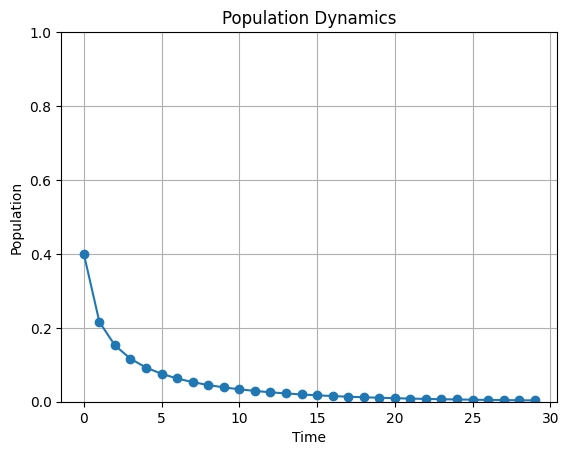

In [13]:
time = np.arange(0, 30)

def simulate_population(r, x0, time):
    x = np.zeros(len(time))
    x[0] = x0
    for t in range(1, len(time)):
        x[t] = logistic_map(r, x[t-1])
    return x


population = simulate_population(0.9, 0.4, time)

plt.title("Population Dynamics")
plt.xlabel("Time")
plt.ylabel("Population")
plt.ylim(0, 1)
plt.grid()

plt.plot(time, population, 'o-');


In [18]:
# Enable interactive plots in VSCode
%matplotlib widget

import ipywidgets as widgets
from IPython.display import display, clear_output


def simulate_population_plot(r, x0, time):
    """Interactive population dynamics simulation using logistic map"""
    # Clear previous output
    clear_output(wait=True)
    
    # Calculate population over time
    x = np.zeros(len(time))
    x[0] = x0
    for t in range(1, len(time)):
        x[t] = logistic_map(r, x[t-1])
    
    # Create plot
    plt.figure(figsize=(10, 5))
    plt.plot(time, x, 'o-', linewidth=2, markersize=5)
    plt.title(f"Population Dynamics (r={r:.2f}, x0={x0:.2f})")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create sliders
r_slider = widgets.FloatSlider(
    value=2.6,
    min=0.1,
    max=4.0,
    step=0.1,
    description='Growth rate (r):',
    continuous_update=False,  # Update only when mouse released
    style={'description_width': 'initial'}
)

x0_slider = widgets.FloatSlider(
    value=0.4,
    min=0.01,
    max=0.99,
    step=0.01,
    description='Initial population (x0):',
    continuous_update=False,
    style={'description_width': 'initial'}
)

# Create interactive widget
interactive_plot = widgets.interact(
    simulate_population_plot, 
    r=r_slider, 
    x0=x0_slider, 
    time=widgets.fixed(time)
)

interactive(children=(FloatSlider(value=2.6, description='r:', max=5.0, min=0.1), FloatSlider(value=0.4, descr…

## Альтернативная версия (если виджеты не работают)

Если виджеты не отображаются в VSCode, попробуйте эту версию с `%matplotlib inline`:

In [ ]:
# Alternative version with inline matplotlib
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact


def simulate_population_interactive(r=2.6, x0=0.4):
    """Interactive population dynamics - inline version"""
    # Calculate population over time
    x = np.zeros(len(time))
    x[0] = x0
    for t in range(1, len(time)):
        x[t] = logistic_map(r, x[t-1])
    
    # Create plot
    plt.figure(figsize=(10, 5))
    plt.plot(time, x, 'o-', linewidth=2, markersize=5, color='steelblue')
    plt.title(f"Population Dynamics (r={r:.2f}, x0={x0:.2f})", fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Population", fontsize=12)
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create interactive plot with simpler interface
interact(
    simulate_population_interactive,
    r=widgets.FloatSlider(value=2.6, min=0.1, max=4.0, step=0.1, description='r:'),
    x0=widgets.FloatSlider(value=0.4, min=0.01, max=0.99, step=0.01, description='x0:')
);

/tmp/ipykernel_3786315/2897933500.py:4: RuntimeWarning: overflow encountered in multiply
  return r * x * (1 - x)


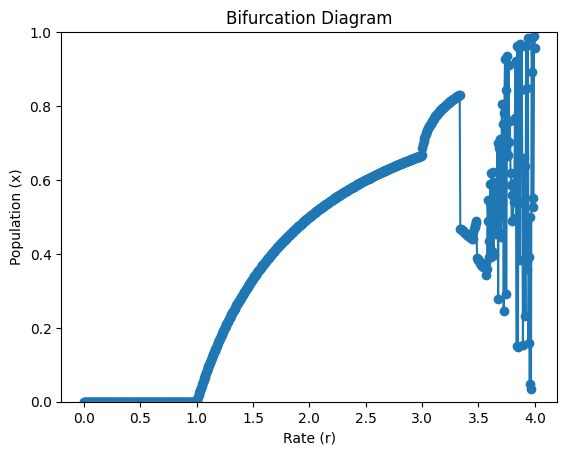

In [16]:
plt.title("Bifurcation Diagram")
plt.xlabel("Rate (r)")
plt.ylabel("Population (x)")
plt.ylim(0, 1)

r = np.linspace(0, 55, 10000)

def bifurkatiom(r):
    x = 0.3 * np.ones(10000)
    for _ in range(10000):
        x = logistic_map(r, x)
    return x

x = bifurkatiom(r)
plt.plot(r, x, 'o-');